In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [4]:
from sklearn.linear_model import LinearRegression
reg_OLS = LinearRegression()

## Méthode Jackknife+

In [6]:
def Jackknife_av_pred(x,X_train,Y_train,reg, alpha):
    n_train=X_train.shape[0]
    
    low, high = np.zeros(n_train), np.zeros(n_train)
    
    for i in range(n_train):
        Reg=reg
        Reg.fit(np.delete(X_train,i).reshape(-1,1),np.delete(Y_train,i).reshape(-1,1)) #ça nous donne le bon prédicteur 
        V_loo = np.abs(Y_train[i] - Reg.predict(X_train[i].reshape(-1,1))) #LOO residuals
        
        low[i] = Reg.predict(x.reshape(1,1)) - V_loo
        high[i] = Reg.predict(x.reshape(1,1)) + V_loo
       
    return (min(low), max(high))

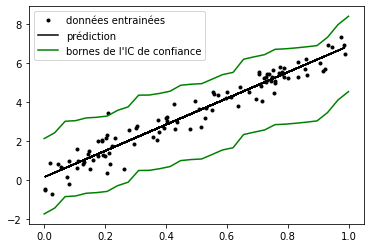

In [10]:
n_train = 100

X_train=np.random.rand(n_train,1)
Y_train=7*X_train + 1/2*np.random.randn(n_train,1)

reg_OLS.fit(X_train,Y_train)

plt.plot(X_train, Y_train, 'k.',label='données entrainées')
plt.plot(X_train, reg_OLS.predict(X_train), 'k-',label='prédiction')

n_test=30
x_new = np.random.rand(n_test,1)
idx = np.argsort(np.ravel(x_new))

low = np.zeros(n_test)
high = np.zeros(n_test)
for i in range(n_test):
    low[i] = Jackknife_av_pred(x_new[idx][i],X_train,Y_train,reg_OLS, 0.1)[0]
    high[i] = Jackknife_av_pred(x_new[idx][i],X_train,Y_train,reg_OLS, 0.1)[1]

plt.plot(np.linspace(0,1,n_test),low, 'g-',label = "bornes de l'IC de confiance")
plt.plot(np.linspace(0,1,n_test),high,'g-')    

plt.legend()
plt.show()